# Galaxies and the large-scale structure of the Universe

_A python exercise notebook written by Rita Tojeiro, October 2017, for the Lab component of the AS1001 Cosmology module at the University of St Andrews, UK.  It was modified to stand alone in an SDSS EPO workshop at AAS in Jan 2018 and then significantly modified to emphasize developing programming skills by Andrea Lommen, Haverford College, January 2018. 
This notebook has benefited from examples provided by Britt Lundgren (University of North Carolina) and Jordan Raddick (John Hopkins University). Tweaked by Karen Masters for ASTR204 Fall 2019 (incuding move to DR15)._ 

In this Notebook, you will use data from the Sloan Digital Sky Survey (SDSS), to explore the relationship between galaxy properties and the large-scale structure of the Universe. 

In the end, you should have found an answer to the following question:

- How are galaxies spatially distributed in the Universe?

The programming skills you should have mastered include:

- Add if statements, Boolean operators, arithmetic operations, and mean/min as necessary.
- Use of np.where
- Writing variables into strings

The programming skills you will have used (but maybe not mastered) include:

- Doing a SQL query to read in data. 


## SDSS

You will be exploring the largest astronomical dataset in the world - the Sloan Digital Sky Survey (www.sdss.org).


### Imports

First, we will import the necessary SciServer and support libraries. 

In [1]:
# Import Python libraries to work with SciServer
import SciServer.CasJobs as CasJobs # query with CasJobs
import SciServer.SciDrive as SciDrive   # read/write to/from SciDrive
import SciServer.SkyServer as SkyServer   # show individual objects and generate 
    # thumbnail images through SkyServer
print('SciServer libraries imported')

# Import other libraries for use in this notebook.
import numpy as np                  # standard Python lib for math ops
from scipy.misc import imsave       # save images as files
import pandas                       # data manipulation package
import matplotlib.pyplot as plt     # another graphing package
import os                           # manage local files in your Compute containers
print('Supporting libraries imported')

import astroML
from astroML.datasets import fetch_sdss_spectrum
from astropy.io import ascii

# Apply some special settings to the imported libraries
# ensure columns get written completely in notebook
pandas.set_option('display.max_colwidth', -1)
# do *not* show python warnings 
import warnings
warnings.filterwarnings('ignore')
print('Settings applied')

SciServer libraries imported
Supporting libraries imported
Settings applied


## Querying the SDSS database

The SDSS data is stored in a SQL database. SQL (standardised query language; people pronounce it as "sequel" is pronounced) is a language used to communicate with databases via "queries". For each query command, the database returns an answer. Usually, this is a subsample of the original database, though SQL can operate on the data very effectively too. In this tutorial we will submit queries to the SDSS database to gather the information that we need, and we will use python to operate on, manipulate, and vizualise that data.

An extensive tutorial on how to query the SDSS database is provided here: http://skyserver.sdss.org/dr15/en/help/howto/search/searchhowtohome.aspx . In short, every SQL command consists of three blocks: 
- The **SELECT** block: it defines the quantities that you want your query to return.
- The **FROM** block: it defines which tables of the database you want SQL to look in.
- The **WHERE** block: it defines any constraints on the data that you want to impose.


### Using SQL and SciServer to return galaxy data

For the database schema and documentation see http://skyserver.sdss.org/dr15/en/help/browser/browser.aspx The following query returns specific information on a sample of galaxies, as a dataframe.


This query finds the RA (right ascension) of all galaxies g-band magnitude brighter than 17. Remember a magnitude of 6 is visible to the naked eye.) 

In [2]:
# Find objects in the Sloan Digital Sky Survey's Data Release 14.
## 
# First, store the query in an object called "query"
# This query gets right ascension (ra) from a catalog called SpecPhotoAll (Spectrographic
# and Photometric information) and limits the query to just objects deemed to be galaxies
# with a redshift in between .02 and .5 and with a g-magnitude brighter than 17.
query="""
SELECT ra
FROM SpecPhotoAll
WHERE class = 'galaxy' AND z BETWEEN .02 and .5 AND modelMag_g < 17
"""
#Then, query the database. The answer is a table that is being returned to a 
# dataframe that we've named right_ascension.
right_ascension = CasJobs.executeQuery(query, "dr15")
right_ascension = (np.array(right_ascension))[:,0]   #We'll learn more about why you need 
# this statement later. For now
# I'll just tell you we're converting it from a table into an array.
#DR15 means "Data Release 15" See http://skyserver.sdss.org/dr15

print("SQL query finished.")
print("SQL query returned " + str(len(right_ascension))+ " galaxies")

SQL query finished.
SQL query returned 100724 galaxies


Let's see what the first 10 elements of right_ascension look like.

In [3]:
right_ascension[0:10]

array([172.79545, 173.60386, 173.66972, 173.61061, 173.69272, 173.12968,
       173.77757, 173.58356, 173.51957, 174.06404])

What is right ascension? Put it in your words and also explain how you think about it. (I know this is review, but I figured it'd be useful.)

On a scale of 1-10, how useful was printing out the first 10 elements? What would you actually like to know about this 100,724 galaxies you just read in? 

What else could you do that would help you know whether the reading in of those galaxies went well? (Put your answer below BEFORE you look below and BEFORE you go on.)

Since it's right ascension, we'd expect the minimum to be 0 and the maximum to be 360 degrees (right ascension is like longitude.) Print out the min and max below.

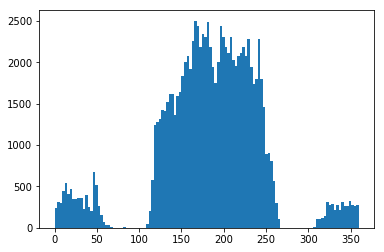

In [5]:
"""  Let's go a little farther and actually make a histogram of our array. What
do we expect this to look like? I'd be a little surprised if there were more galaxies
at particular right ascensions compared to others. Aren't galaxies distributed equally
across the universe?"""
plt.hist(right_ascension, bins='auto');  #The semi-colon there keeps it from printing
    # the array it's going to plot. Take the semi-colon away and look at it!

Ah look at that!  That's really not what you might expect. You might expect an even distribution of right ascensions from 0 to 360. We'll get to that in a little bit.  For now, notice how useful this was to use plots
to find out about your data (especially when it's more than 100,000 galaxies.)

### Your turn!  Now get an array of the declinations instead of the right ascension. The keyword is "dec".


And again in your own words, say what declination is.

Use the three techniques we used above to get a sense of whether your query worked and what your data looks like. 

Comment on what you learned from looking at those 10 elements.

Next print the min and max of the array.

What did you learn from the max and min?  Is it what you were expecting?  How can you explain it? (Take a guess.)

Now plot the histogram.

What did you learn from the histogram?  Is it what you were expecting? Are there any features that surprise you? How can you explain what you see?  (Take a guess.)

Why is there nothing below -10 degrees or above 70 degrees?  _Hint: http://www.sdss.org/dr15/scope/ _

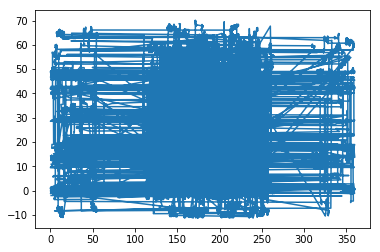

In [18]:
#Now let's plot the right_ascension and declination on the same plot!
plt.plot(right_ascension, declination)

That is not a very useful plot because it connected all the points together. 
(Sometimes that's what you want, but not here.)

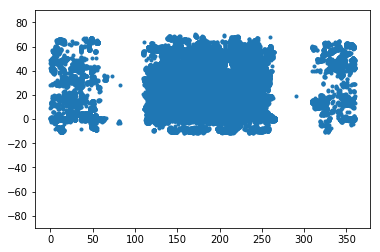

In [19]:
plt.ylim(-90,90)          # I want to force it to show me all declinations from -90 to 90
plt.plot(right_ascension, declination, ".") # Using a period as a marker.

Your turn!   See here https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html and experiment with some other shapes and colors. You might find the keyword "markersize" useful to adjust the point (or marker) size. Just show one of the plots you experimented with below. Also get the plot to show just the range from 120 to 250 in RA and from 0 to 60 in declination.

What do you notice about the distribution of galaxies across the sky?

### Now that you're used to getting these statistics, write a function that does all this for any variable you want...
Write a *show_stats* function that takes two inputs, the name of the variable you want from the SDSS database, and the limiting value of the g magnitude, prints the first 10 elements, finds the min, max, and mean, plots a histogram, and returns an array containing that column. Make it so that the printed output explains what you're seeing, i.e. "the max and min are....blah blah."

One subtlety here is that the "query" statement that you've been creating is a string, so it's slightly tricky to write the name of the variable you want to it.  As with everything in Python there are multiple ways to do this.  I did it this way (this is the beginning of my function definition.)

```ruby
def show_stats(varname, glimit):
    query="""   
    SELECT {}
    FROM SpecPhotoAll
    WHERE class = 'galaxy' AND z BETWEEN .02 and .5 AND modelMag_g < {}
    """.format(varname, glimit)
```
    
The { }'s in the query tell Python where to put _varname_ and _glimit_ into the string. _I'll give you a hint about how I figured this out. I experimented with the query statement all by itself in a cell.  My practice cell looked like this:_ 

```ruby
varname = 'ra'
glimit = 10
query="""   
SELECT {}
FROM SpecPhotoAll
WHERE class = 'galaxy' AND z BETWEEN .02 and .5 AND modelMag_g < {}
""".format(varname, glimit)

print (query)
```
I encourage you to practice like this a little bit until you get the hang of how this works. Move the { }'s around, try writing your own phrases and putting different words into them, stuff like that.

Note that your function will crash if you give it a variable name that returns a string (for example 'class' yields a string like 'galaxy' rather than 'ra' which yields a number of degrees). You may assume that no one would be silly enough to try. A better programming practice would be to check first to make sure that the data is of the right type (a number) before trying to take the min, max, or mean. For bonus style points you may make your function more robust so that it appropriately checks the type before doing the calculation.


### And finally get an array of redshift. Keyword is "z".   
Use your function!  And make sure to comment on the output you see (the first 10 numbers, the min/max, and the histogram.) And for now set the g magnitude limit to 17 like you did for RA and DEC.

For fun, let's see what the histogram looks like if we go out another factor of 10 in brightness, which is 5 magnitudes, so out to a limiting g-magnitude of 22. Do that now. (Be sure to celebrate how easy this is now that you have your function!)

What are your thoughts on this graph?

A redshift of 0.5 means that the galaxy is traveling away from us at half the speed of light!

Now repeat the original query with the g<17 criterion because otherwise we're going to get really messed up below.

In [45]:
varname='z'
glimit=17
query="""   
    SELECT {}
    FROM SpecPhotoAll
    WHERE class = 'galaxy' AND z BETWEEN .02 and .5 AND modelMag_g < {}
    """.format(varname, glimit)
    
print("Running SQL query for ", varname)

varname = CasJobs.executeQuery(query, "dr15")
varname = (np.array(varname))[:,0]   # converting it from a table into an array.    
print("SQL query finished")
print("SQL query returned " + str(len(varname))+ " galaxies")

z=varname

Running SQL query for  z
SQL query finished
SQL query returned 100724 galaxies


# Converting redshift to distance
To convert redshift to distance you multiply by the speed of light,c, and divide by Hubble's Constant,H, which measures the rate of expansion of the universe. 

c = 3.0e5 kilometers/second   Please notice that 3.0e5 is Python shorthand for "3 times 10 to the 5th". I'll send your workbook back to you immediately if I see any 3.0\*10**5 in it.

H  = 72.0 km s$^{-1}$Mpc$^{-1}$    Those units are weird.  You can also write it $\frac{km/s}{Mpc}$. The way I say that is "kilometers per second per megaparsec" and I think about it as a velocity (km/s) per distance (Mpc). If a galaxy is 1 Mpc away from us, it will be traveling at a speed of 72.0 km/s away from us. If it's 2 Mpc away from us, it will be traveling at a speed of 144.0 km/s....

In the next cell, please explain what units your answer will be in once you multiply by c and divide by H.  You were trying to convert a redshift to a distance. Do you have units of distance?

d = z*c/H will have units of km/s/(km/s/Mpc) = Mpc which is a unit of distance. Hooray. 

Now do the calculation to convert redshift to distance. (You should end up with an array called "distance.")

What are the min and max of distance? Express them in both Mpc and Mly.

Do those distances seem reasonable to you? Why?   Our nearest neighbor galaxy is less than a Mpc away, and the edge of the observable universe is about 15,000 Mpc away, so it'd be really weird if you got a galaxy distance that wasn't in between these two extremes. (So if you did, go back and find your mistake.)

The values are between those two. 

How many of the distances are close to that lower end? More specifically how many distances are less than 100 Mpc? HINT: how can you make a sub-list with only values <100 Mpc in and count the length of it. 

Calculate what fraction of the distances are within 100 Mpc.  Get your answer to appear nicely as a sentence with a % sign in it.

The final task will be to make a plot of the sky, with the points showing galaxies being color coded by the galaxy's distance from us. You do this most easilly by making a series of say 3 sets of galaxies selected to have different distance ranges. Experiment with the exact selection of the distance ranges to get an interesting plot As before, get the plot to show just the range from 120 to 250 in RA and from 0 to 60 in declination. Comment on the plot, and why you selected the color ranges you selected. 

**Congratulations, that is the end of the Lab!** Make sure you've **run all the code cells, filled in all the text answers and that your plots are all showing without error**. You can make a PDF of it to submit to Moodle. 